In [3]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from pytorch_lightning import Trainer

from utility.torch import CustomDataset, Model, test_on_dataset, get_accuracy

In [7]:
train_dataset = CustomDataset('data/mnist/train-images-idx3-ubyte',
                              'data/mnist/train-labels-idx1-ubyte')
test_dataset = CustomDataset('data/mnist/t10k-images-idx3-ubyte',
                             'data/mnist/t10k-labels-idx1-ubyte')
train_dataset, val_dataset = random_split(train_dataset, [50000, 10000])

print('training data size:', len(train_dataset))
print('validation data size:', len(val_dataset))
print('test data size:', len(test_dataset))

train_dataloader = DataLoader(train_dataset, batch_size=128)
val_dataloader = DataLoader(val_dataset, batch_size=128)
test_dataloader = DataLoader(test_dataset, batch_size=128)

training data size: 50000
validation data size: 10000
test data size: 10000


In [4]:
# Initialize and train the model
model = Model()
trainer = Trainer(max_epochs=20, progress_bar_refresh_rate=20)
trainer.fit(model, train_dataloader, val_dataloader)

# Save the model weights
trainer.save_checkpoint('model/model.ckpt')

# Launch tensor board on terminal
# tensorboard --logdir='lightning_logs'

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name    | Type      | Params
--------------------------------------
0 | layer_1 | Conv2d    | 832   
1 | layer_2 | Conv2d    | 9.2 K 
2 | layer_3 | Linear    | 1.4 M 
3 | layer_4 | Linear    | 4.2 K 
4 | layer_5 | Linear    | 650   
5 | pool    | MaxPool2d | 0     
6 | relu    | ReLU      | 0     
7 | dropout | Dropout   | 0     
--------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.598     Total estimated model params size (MB)
/Users/ree/PycharmProjects/Personal/sudoku-solver/venv/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve per

Validation sanity check: 0it [00:00, ?it/s]

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Prediction: tensor([4])
Truth: tensor(4)


/Users/ree/PycharmProjects/Personal/sudoku-solver/venv/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


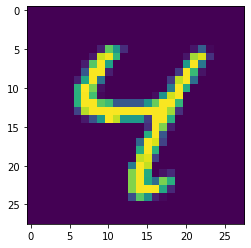

In [8]:
# Load the saved model
model = Model.load_from_checkpoint('model/model.ckpt')

# Sanity check
index = 6
test_on_dataset(test_dataset, model, index)

In [9]:
print('Training Set')
get_accuracy(train_dataset, model)
print('Validation Set')
get_accuracy(val_dataset, model)
print('Test Set')
get_accuracy(test_dataset, model)

Training Set
Accuracy: tensor(0.9967)
Validation Set
Accuracy: tensor(0.9968)
Test Set
Accuracy: tensor(0.9912)


/Users/ree/PycharmProjects/Personal/sudoku-solver/venv/lib/python3.8/site-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `Accuracy` was deprecated since v1.3.0 in favor of `torchmetrics.classification.accuracy.Accuracy`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)
